OBJECTIVE: Build a Loan Approval Prediction Model using Jupyter Notebook. Use machine learning techniques to predict whether a loan application will be approved or not based on various factors such as applicant income, loan amount, credit history

In [217]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [218]:
#Load the dataset
loan_data=pd.read_csv("C:/Users/USER/Desktop/LoanApprovalPrediction.csv")

In [219]:
#Preview the first 10 rows
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [220]:
#Have a look at the shape of the dataset
loan_data.shape

(598, 13)

In [225]:
# Get more information about the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [227]:
# Check if there are missing data
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [229]:
# Handle Missing Values
#Check the percentage of missing values
loan_data.isnull().mean()*100

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           2.006689
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.511706
Loan_Amount_Term     2.341137
Credit_History       8.193980
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [231]:
# Remove unnecessary columns
#Drop 'Loan_ID'
loan_data.drop('Loan_ID', axis=1, inplace=True)

In [233]:
#Check if 'Loan_ID'  column has been dropped
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [235]:
# Fill in missing  values in 'Dependents' columns with the mode
#Find the mode
dependents_mode=loan_data['Dependents'].mode()[0]
#Replace the missing values with the mode
loan_data['Dependents'].fillna(dependents_mode, inplace=True)

In [237]:
# Deal with 'LoanAmount' missing values
# I am going to use the median value since it is less sensitive to outliers
#Find the median
LoanAmount_median=loan_data['LoanAmount'].median()
# Replace the missing values with the median
loan_data['LoanAmount'].fillna(LoanAmount_median, inplace=True)


In [239]:
# Fill in missing values in 'Loan_Amount_Term' and 'Credit_History' with the mode
Loan_Amount_Term_mode=loan_data['Loan_Amount_Term'].mode()[0]
Credit_History_mode=loan_data['Credit_History'].mode()[0]
loan_data['Loan_Amount_Term'].fillna(Loan_Amount_Term_mode,inplace=True)
loan_data['Credit_History'].fillna(Credit_History_mode, inplace=True)

In [241]:
#Check if all the missing values have been dealt with succesfully
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [243]:
#Check for unique values in some columns
unique_values = {column: loan_data[column].unique() 
                 for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']}

# Print unique values in a clean, organized manner
for column, values in unique_values.items():
    print(f"{column}: {', '.join(map(str, values))}")


Gender: Male, Female
Married: No, Yes
Dependents: 0.0, 1.0, 2.0, 3.0
Education: Graduate, Not Graduate
Self_Employed: No, Yes
Property_Area: Urban, Rural, Semiurban
Loan_Status: Y, N


In [245]:
#Chenge the above objects to float
encoding = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'No': 0, 'Yes': 1},
    'Dependents': {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Urban': 1, 'Rural': 0, 'Semiurban': 2},
    'Loan_Status': {'Y': 1, 'N': 0}
}

# Apply the encoding to the loan_data DataFrame
loan_data.replace(encoding, inplace=True)

loan_data.info()

                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int64  
 2   Dependents         598 non-null    float64
 3   Education          598 non-null    int64  
 4   Self_Employed      598 non-null    int64  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    int64  
 11  Loan_Status        598 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 56.2 KB


In [247]:
#Check the first few rows
loan_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,127.0,360.0,1.0,1,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2.0,1,1,5417,4196.0,267.0,360.0,1.0,1,1
6,1,1,0.0,0,0,2333,1516.0,95.0,360.0,1.0,1,1
7,1,1,3.0,1,0,3036,2504.0,158.0,360.0,0.0,2,0
8,1,1,2.0,1,0,4006,1526.0,168.0,360.0,1.0,1,1
9,1,1,1.0,1,0,12841,10968.0,349.0,360.0,1.0,2,0


In [251]:
# Define target variable and feature variables
target = 'Loan_Status'
features = loan_data.drop(columns=[target])
X = features  # Independent variables
y = loan_data[target]  # Dependent variable (target)


In [253]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [255]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform on training data, then transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [257]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [268]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report
cr = classification_report(y_test, y_pred)
print(f"Classification Report:\n{cr}")



Accuracy: 0.80
Confusion Matrix:
[[16 19]
 [ 5 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.46      0.57        35
           1       0.81      0.94      0.87        85

    accuracy                           0.80       120
   macro avg       0.78      0.70      0.72       120
weighted avg       0.79      0.80      0.78       120



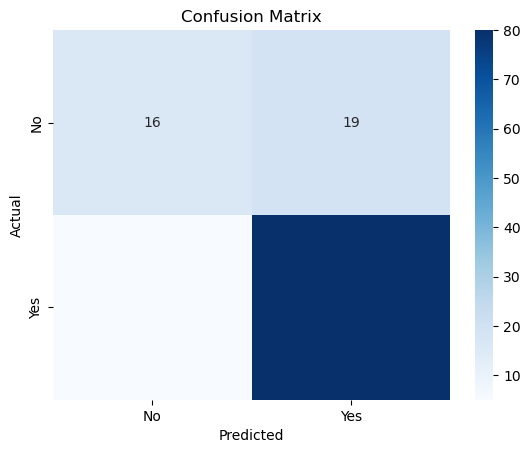

In [266]:
# Visualize Confusion Matrix (optional)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [270]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Random Forest model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test_scaled)
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Model Accuracy: 0.82


In [272]:
import joblib

# Save the trained model
joblib.dump(model, 'loan_approval_model.pkl')


['loan_approval_model.pkl']